In [1]:
__author__ = "@Tssp"
__date__ = "22/10/21"
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from GPE_Split_Step_Fourier import GPE_Solver
import os
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2

In [199]:
L    = 40   # Domain size
N    = 600  # Number of grid points
dX   = L/N  # Cell size
x    = np.arange(-L/2, L/2, dX, dtype=complex)
dT   = 0.01 # Time step size
k    = 2*pi*np.fft.fftfreq(N, d=dX)
g    = 1
nu   = 0.3
figure_path = 'Figures'
os.makedirs(figure_path, exist_ok=True)

In [200]:
def V(x):
    return np.zeros(x.shape)

V = V(x)

# Dark Solitons

In [201]:
def dark_soliton(x, x0, nu=0.5):
    gamma = 1/np.sqrt(1 - nu**2)
    return (1j*nu + np.tanh((x - x0)/gamma)/gamma)*np.ones(x.shape)

psi0 = dark_soliton(x, -5, nu) * dark_soliton(x, 5, -nu)

In [202]:
GPE = GPE_Solver(x, V, psi0, k)

GPE Solver initialized for a GRID from -20.0 to 19.933333333333195 
hbar=1 
m=1
In order to see the potential and the initial wavefunction we highly recommend to run:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, GPE.abs_square(psi0))
ax.plot(x, V, 'k')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$|\psi_0(x)|^2$')
        


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$|\\psi_0(x)|^2$')

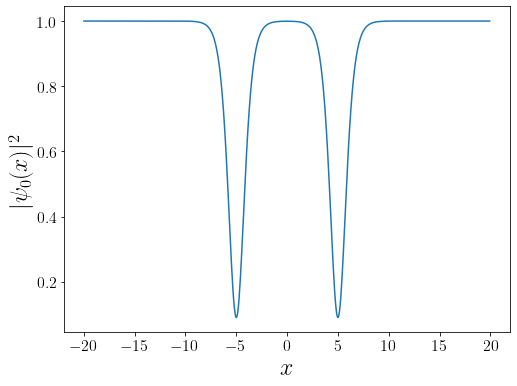

In [203]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, GPE.abs_square(psi0))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$|\psi_0(x)|^2$')

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:2802: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


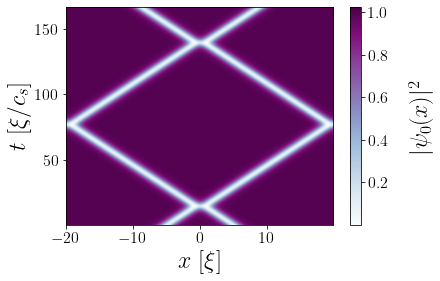

In [204]:
n_steps = int(50/(nu*dT))
GPE.run_and_plot(n_steps, dT, g)

T = 126 xi/c_s


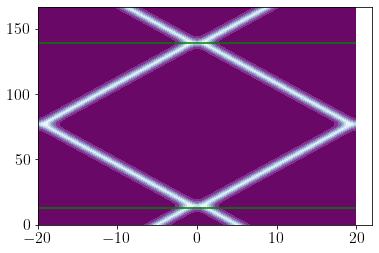

In [205]:
fig2, ax2 = plt.subplots()
plt.contourf(x, np.linspace(0, n_steps*dT, n_steps+1), GPE.prob_densities, cmap='BuPu')
plt.hlines(13, -20, 20, color='g')
plt.hlines(139, -20, 20, color='g')
print(f'T = {139 - 13} xi/c_s')

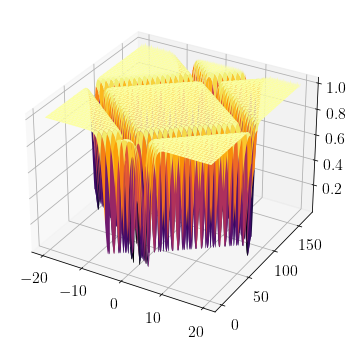

In [206]:
t = np.linspace(0, n_steps*dT, n_steps+1)
X, T = np.meshgrid(np.real(GPE.x), t)
fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.gca(projection='3d')
ax2.plot_surface(X, T, GPE.prob_densities, cmap='inferno')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


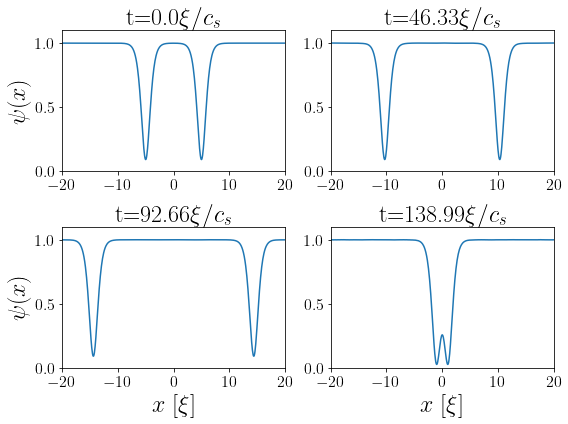

In [136]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
count = 0
for i in range(2):
    for j in range(2):
        ax[i][j].plot(x, GPE.prob_densities[count*4683])
        ax[i][j].set_xlim(-20, 20)
        ax[i][j].set_ylim(0, 1.1)
        ax[i][j].set_title(f't={round(count*dT*4633, 2)}'+r'$\xi/c_s$')
        count+=1
ax[1][0].set_xlabel('$x$ $[\\xi]$')
ax[1][1].set_xlabel('$x$ $[\\xi]$')
ax[0][0].set_ylabel('$\psi(x)$')
ax[1][0].set_ylabel('$\psi(x)$')
fig.tight_layout()

# Bright Solitons

In [264]:
def bright_soliton(x, x0, nu=0.5):
    gamma = 1/np.sqrt(1 - nu**2)
    return (1j*nu + 1/np.cosh((x - x0)/gamma)/gamma)*np.ones(x.shape)

dT   = 0.001 # Time step size
nu   = 0.3
g    = -1
psi0 = bright_soliton(x, -5, nu) + bright_soliton(x, 5, -nu)

In [265]:
GPE = GPE_Solver(x, V, psi0, k)

GPE Solver initialized for a GRID from -20.0 to 19.933333333333195 
hbar=1 
m=1
In order to see the potential and the initial wavefunction we highly recommend to run:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, GPE.abs_square(psi0))
ax.plot(x, V, 'k')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$|\psi_0(x)|^2$')
        


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$|\\psi_0(x)|^2$')

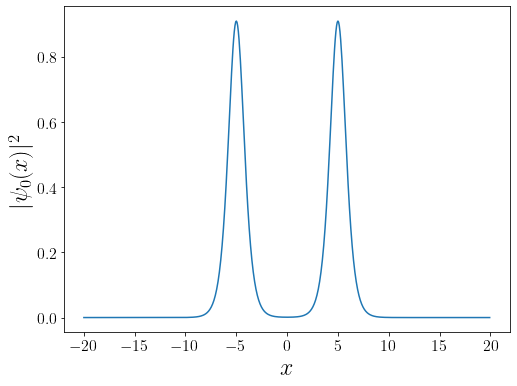

In [266]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(GPE.x, GPE.abs_square(psi0))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$|\psi_0(x)|^2$')

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:2802: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


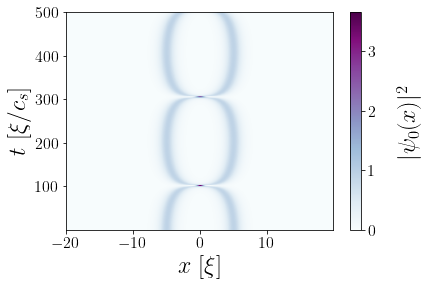

In [267]:
n_steps = int(150/(nu*dT))
t = np.linspace(0, n_steps*dT, n_steps+1)
X, T = np.meshgrid(np.real(GPE.x), t)
GPE.run_and_plot(n_steps, dT, g)

maxes are located in t=101.812, and t=305.443, so the period is: 203.63099999999997


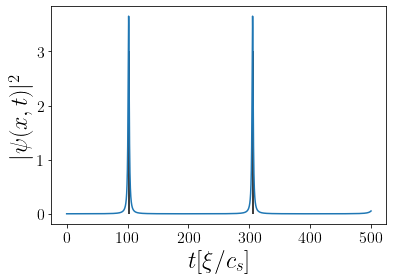

In [344]:
plt.plot(t, GPE.prob_densities[:,300])
plt.xlabel(r'$t[\xi/c_s]$')
plt.ylabel(r'$|\psi(x,t)|^2$')
plt.vlines(101.812, 0, 3, color='k')
plt.vlines(305.443, 0, 3, color='k')
print(f'maxes are located in t={t[101812]}, and t={t[305443]}, so the period is: {t[305443] - t[101812]}')

(0.0, 3.0)

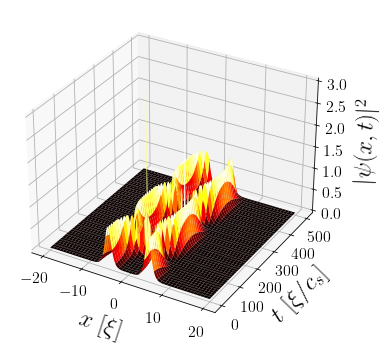

In [270]:
fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.gca(projection='3d')
ax2.plot_surface(X, T, GPE.prob_densities, cmap='hot')
ax2.set_xlabel('$x$ $[\\xi]$', labelpad=10)
ax2.set_ylabel('$t$ $[\\xi/c_s]$', labelpad=10)
ax2.set_zlabel('$|\psi(x,t)|^2$', labelpad=10)
ax2.set_zlim(0, 3)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


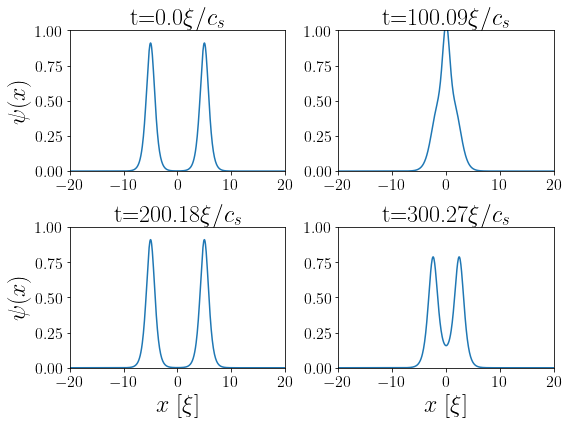

In [283]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
count = 0
for i in range(2):
    for j in range(2):
        ax[i][j].plot(x, GPE.prob_densities[count*100090])
        ax[i][j].set_xlim(-20, 20)
        ax[i][j].set_ylim(0, 1)
        ax[i][j].set_title(f't={round(count*dT*100090, 2)}'+r'$\xi/c_s$')
        count+=1
ax[1][0].set_xlabel('$x$ $[\\xi]$')
ax[1][1].set_xlabel('$x$ $[\\xi]$')
ax[0][0].set_ylabel('$\psi(x)$')
ax[1][0].set_ylabel('$\psi(x)$')
fig.tight_layout()

# GIF

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/p

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/p

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/p

IndexError: index 505000 is out of bounds for axis 0 with size 500001

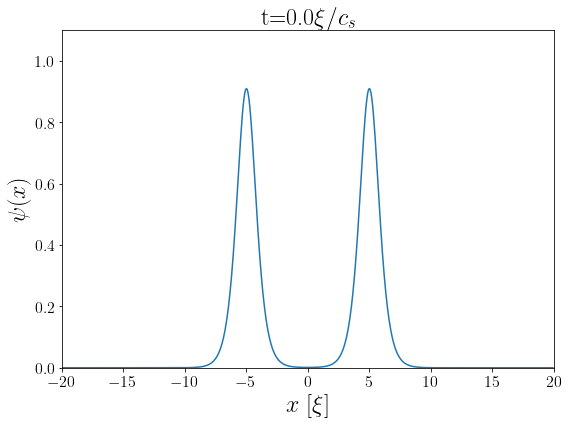

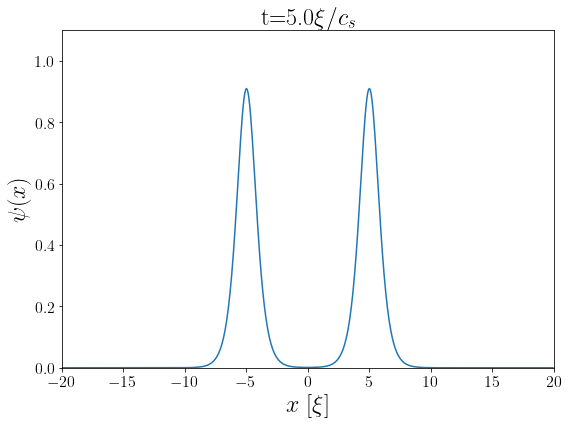

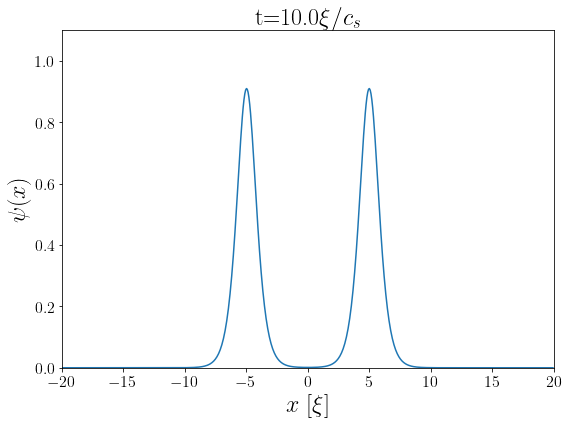

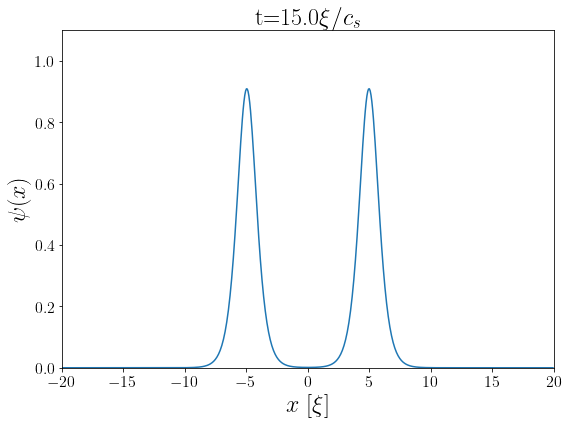

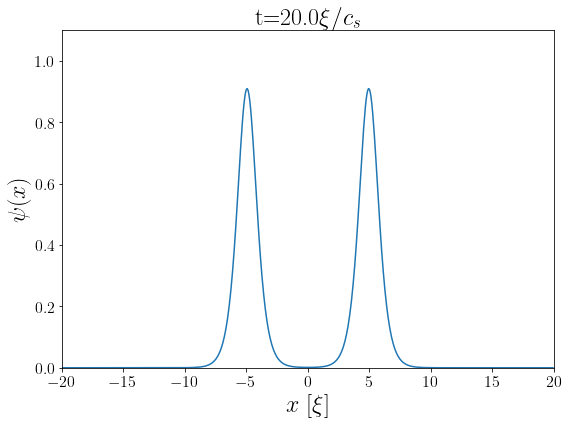

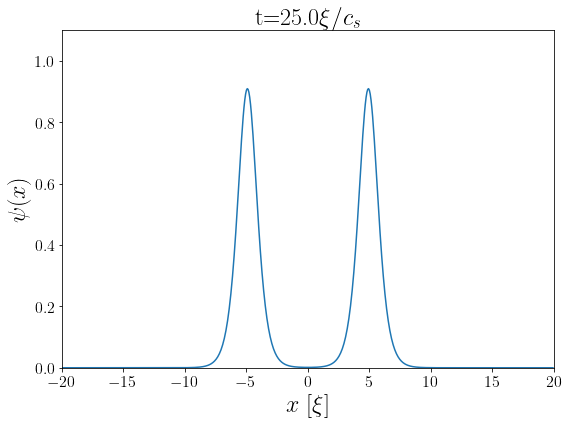

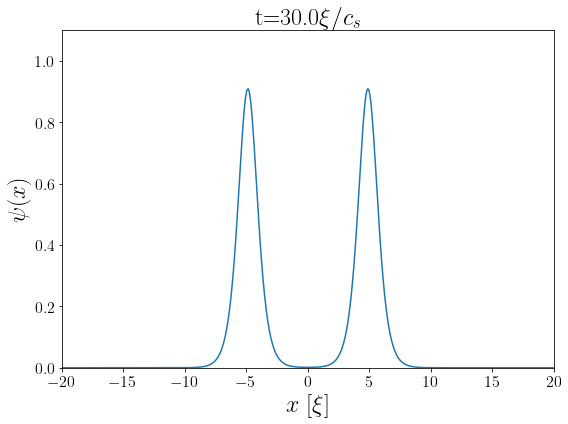

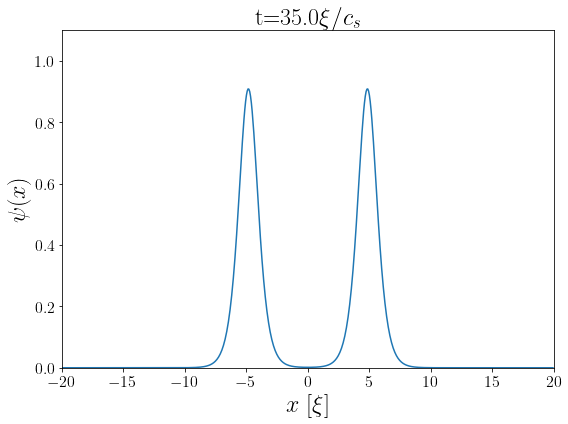

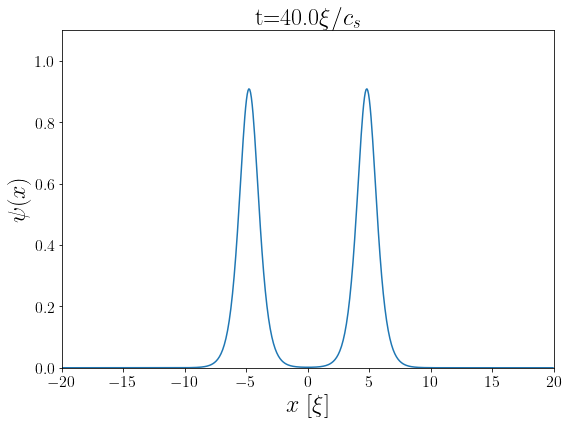

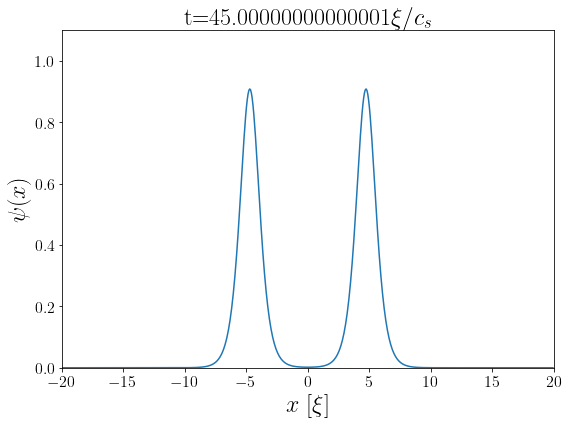

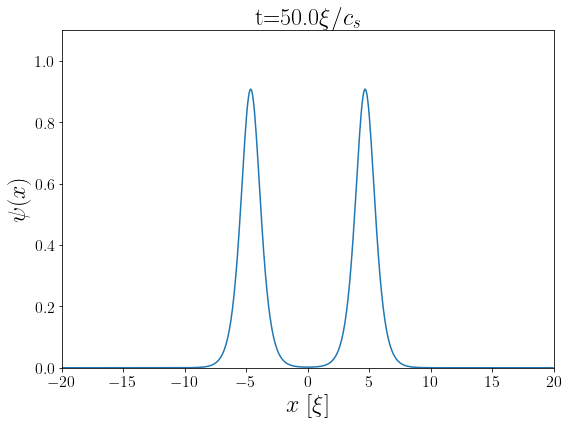

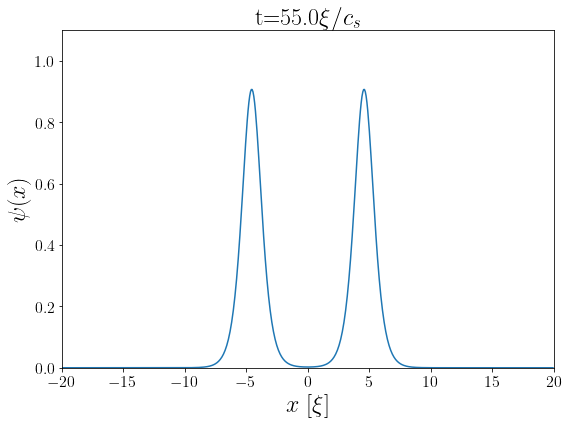

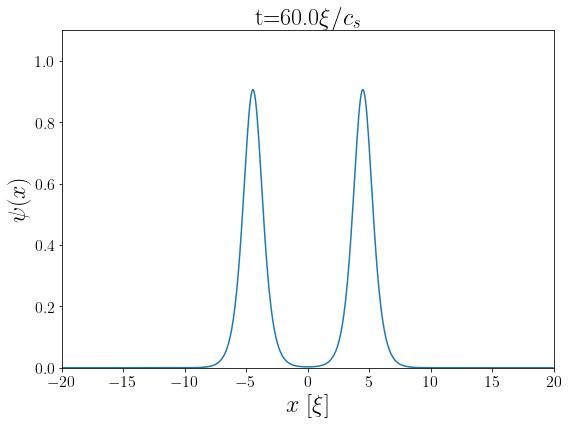

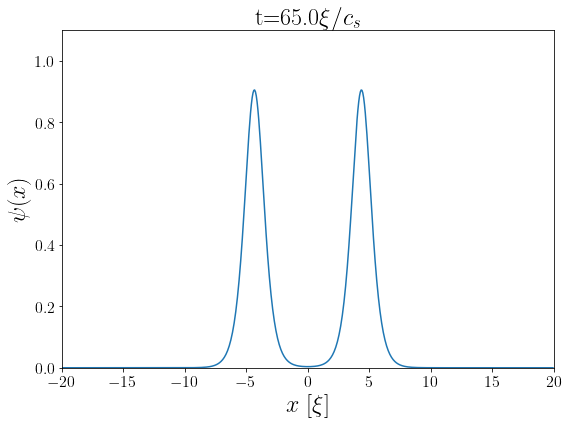

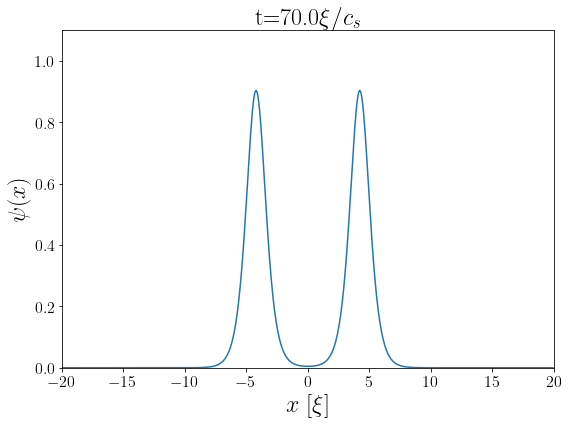

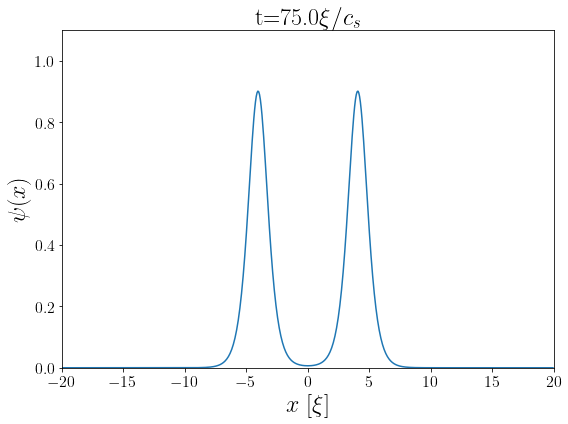

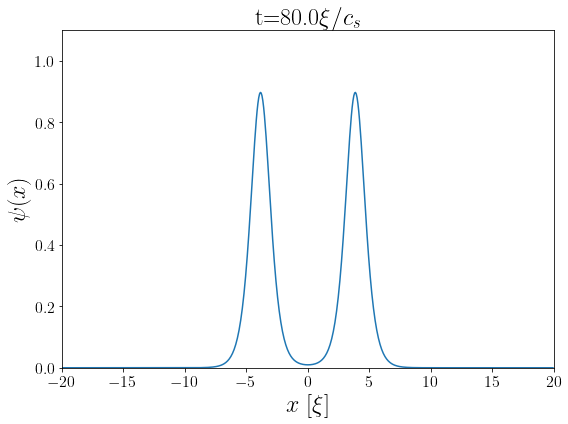

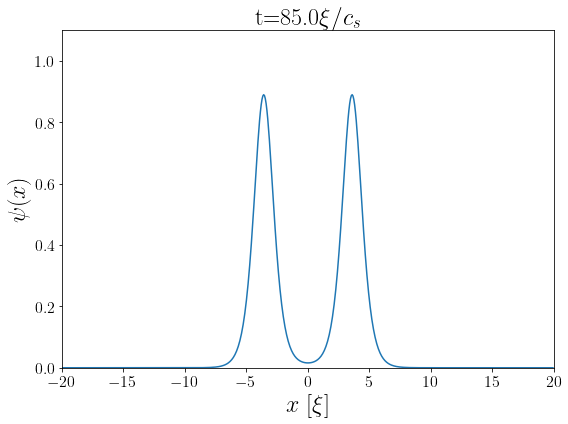

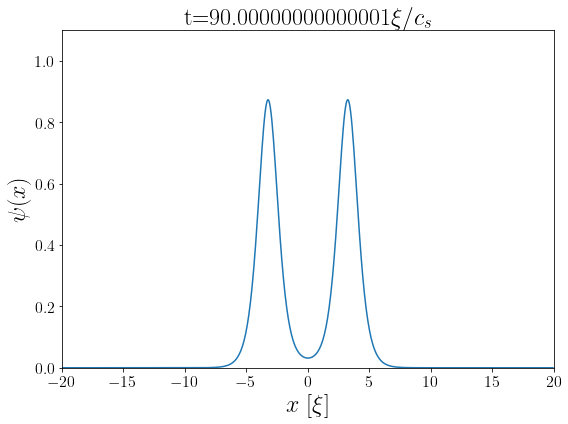

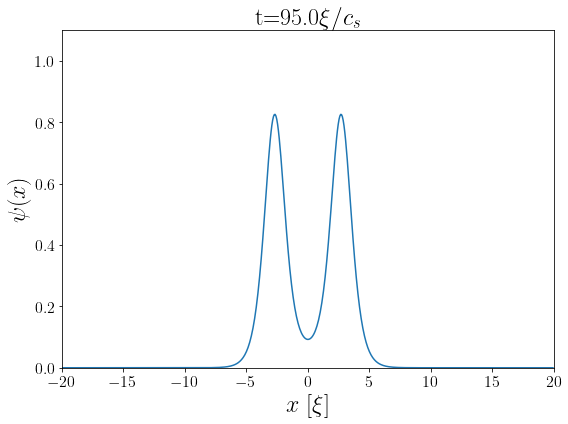

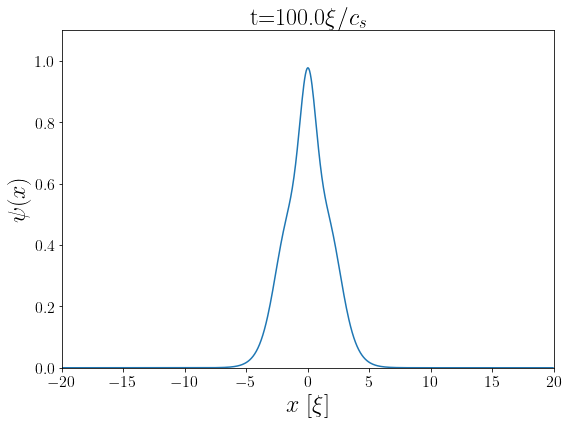

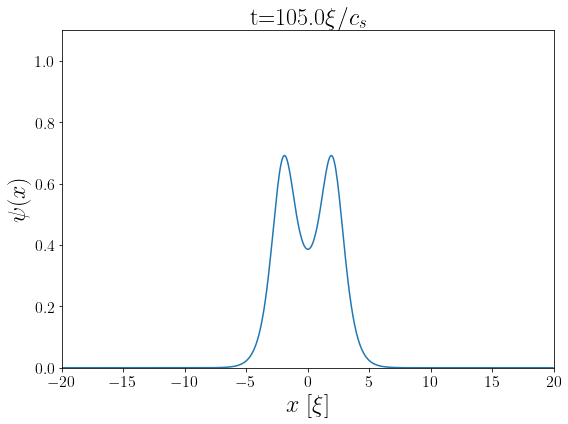

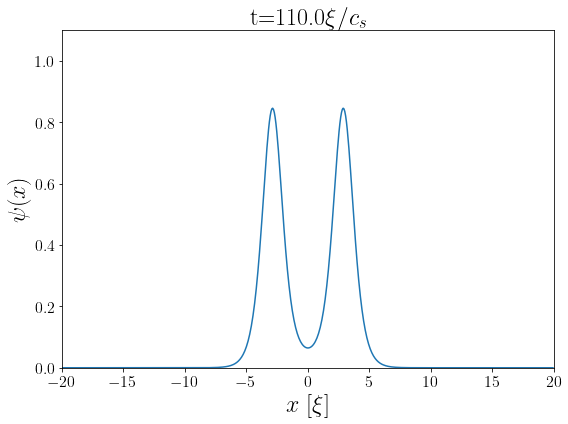

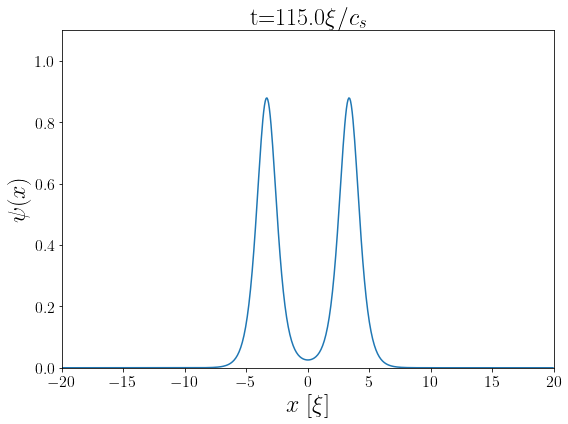

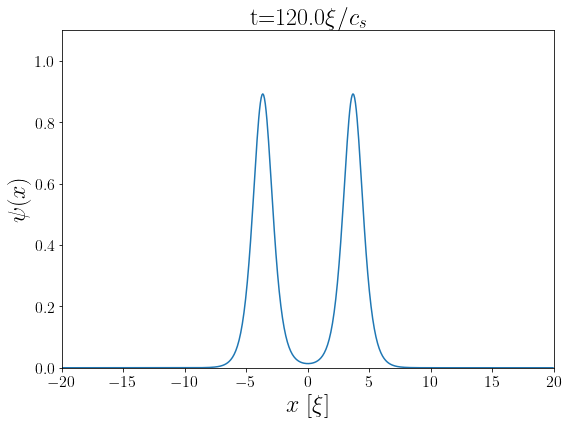

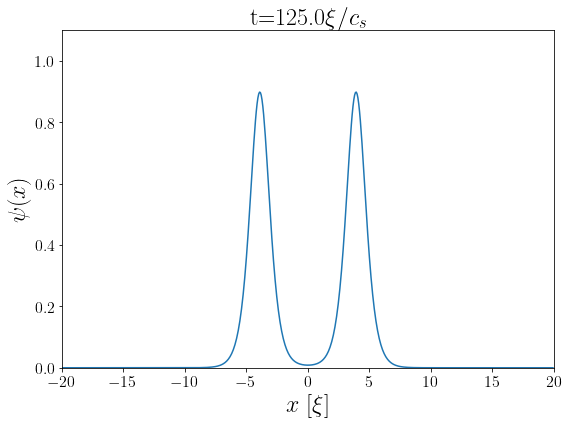

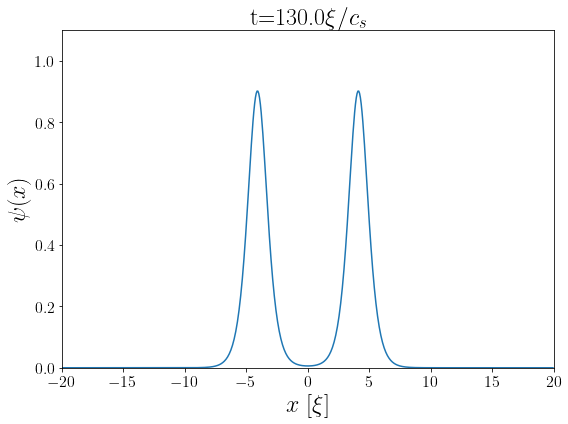

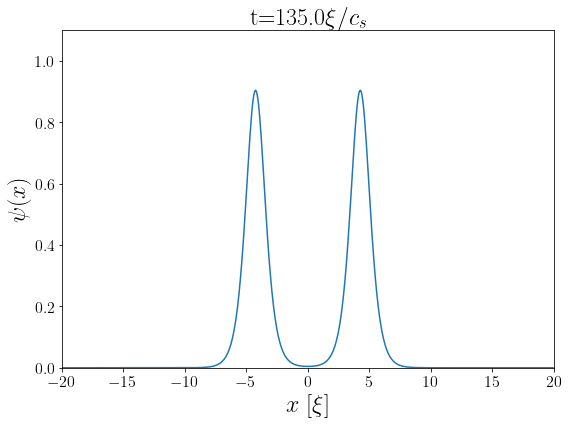

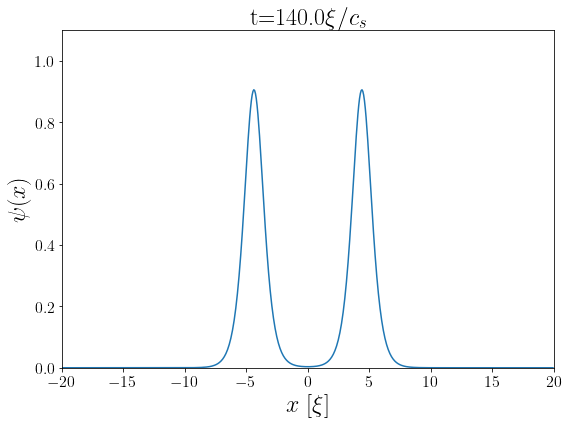

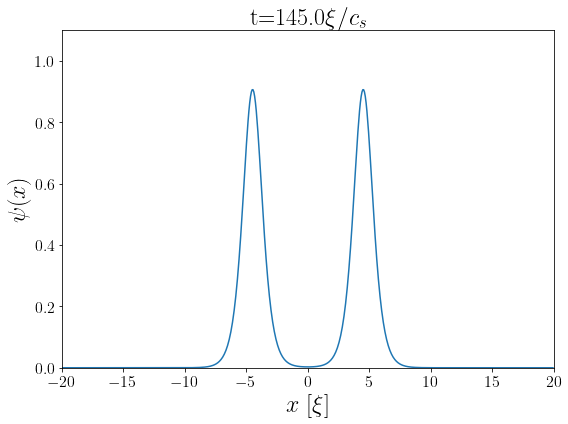

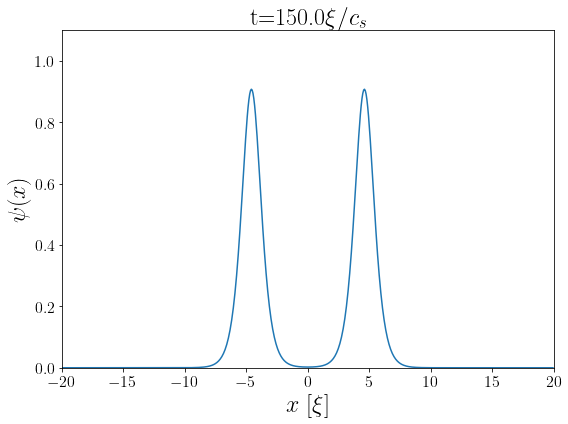

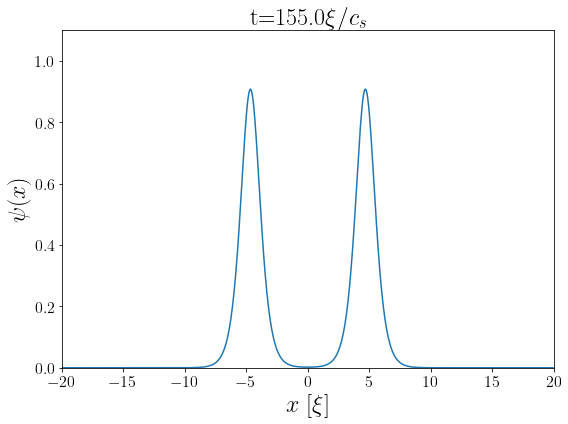

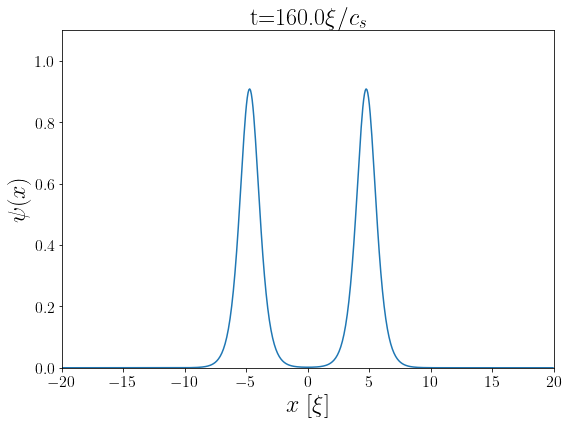

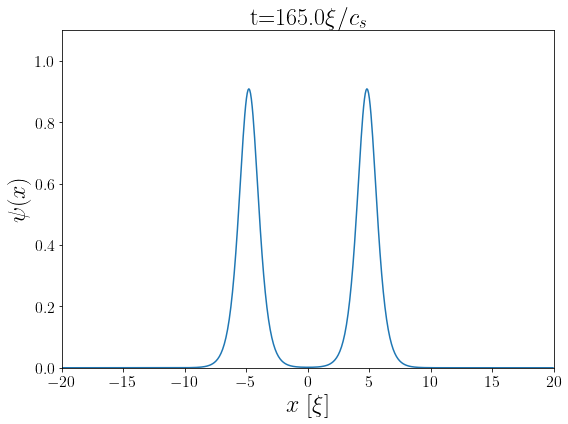

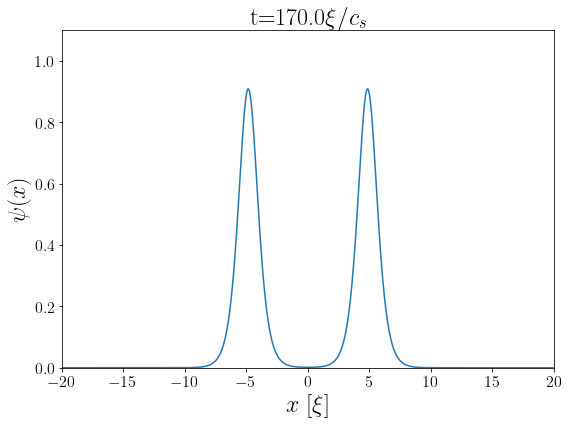

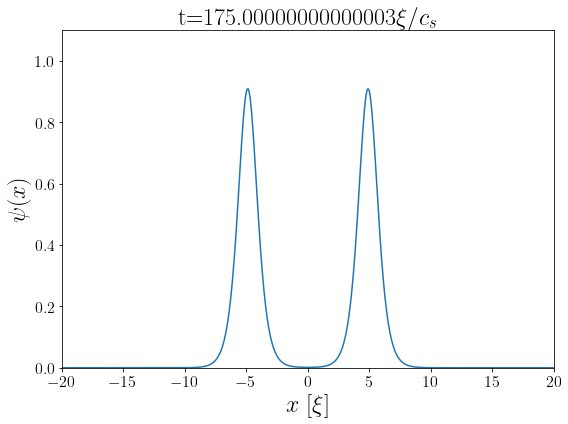

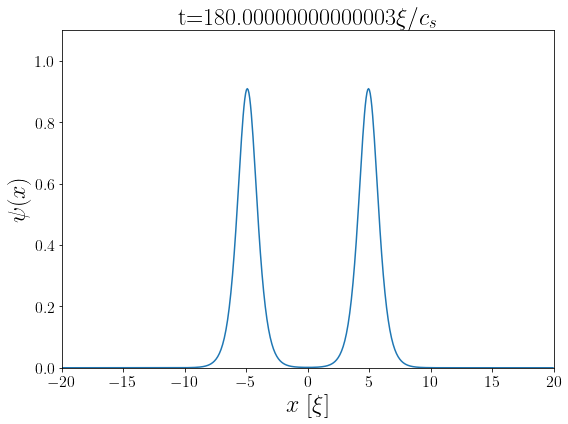

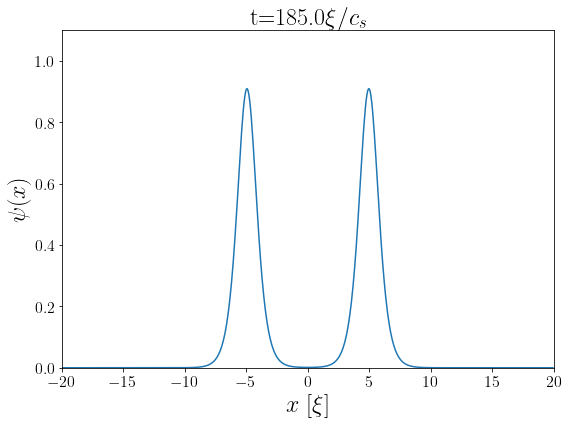

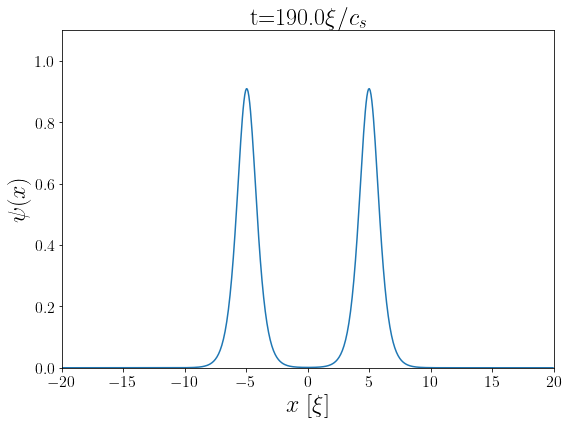

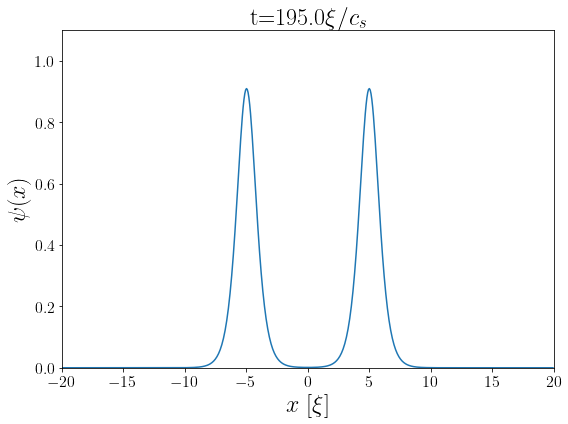

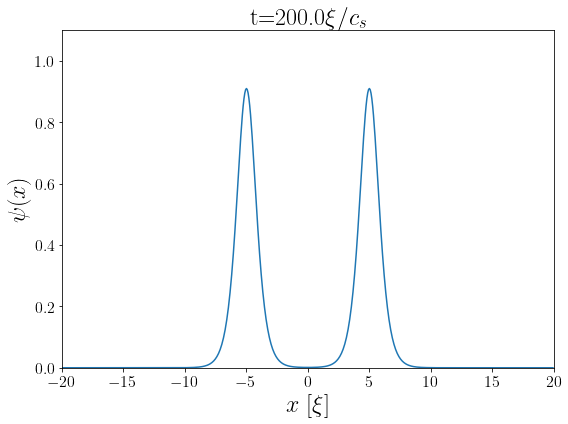

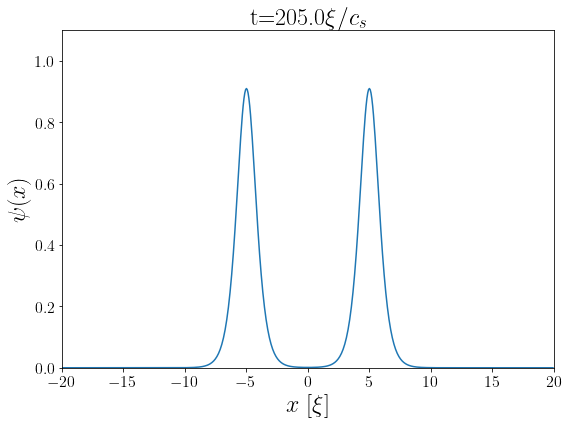

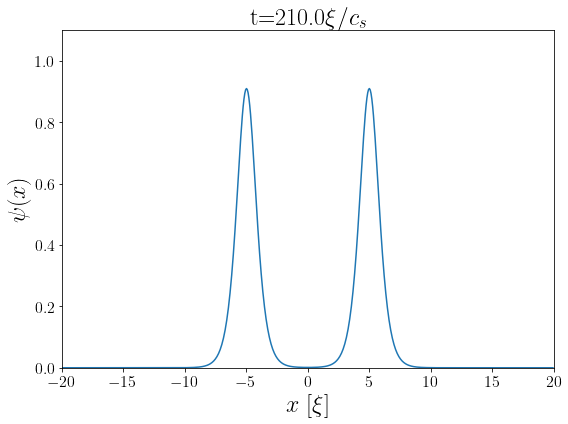

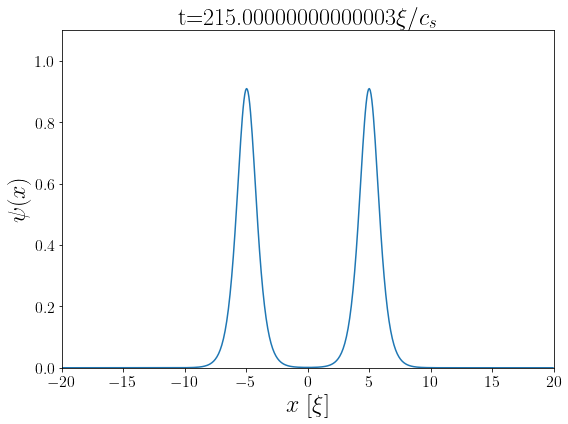

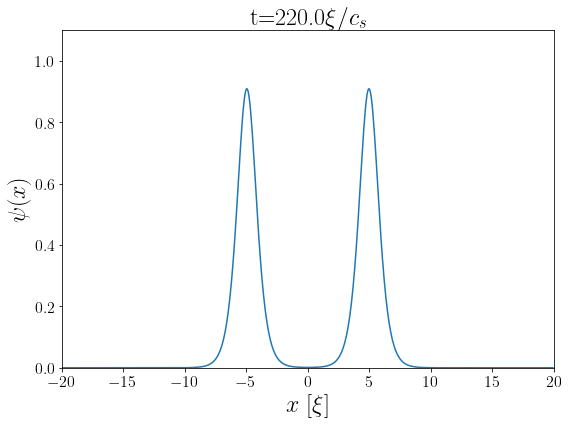

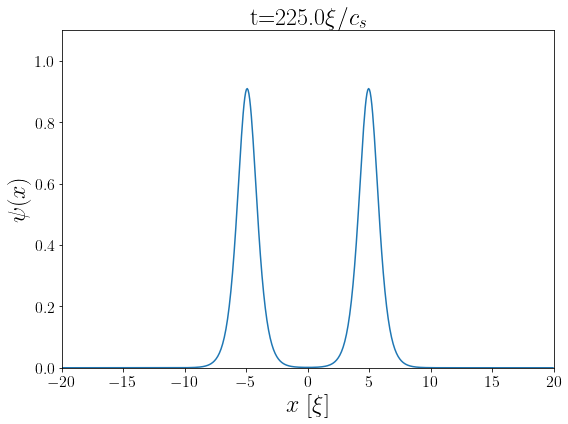

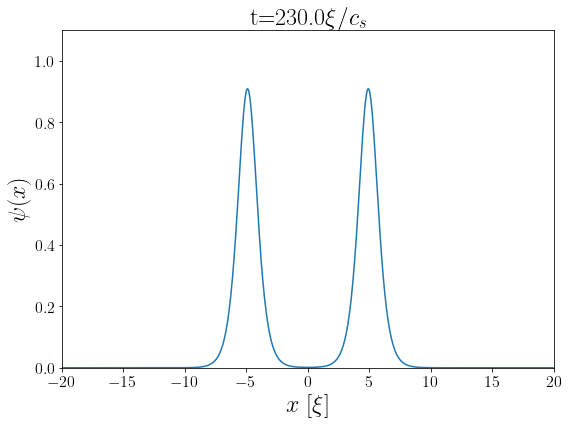

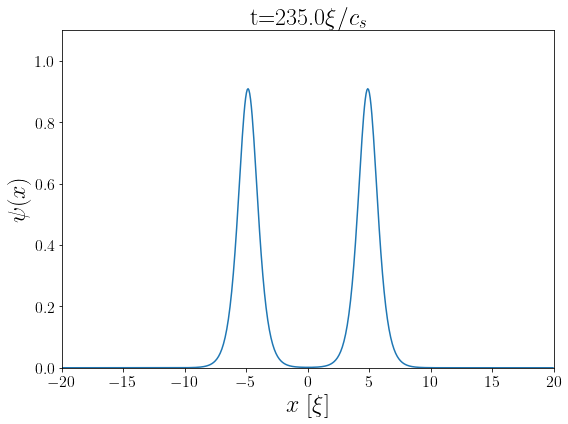

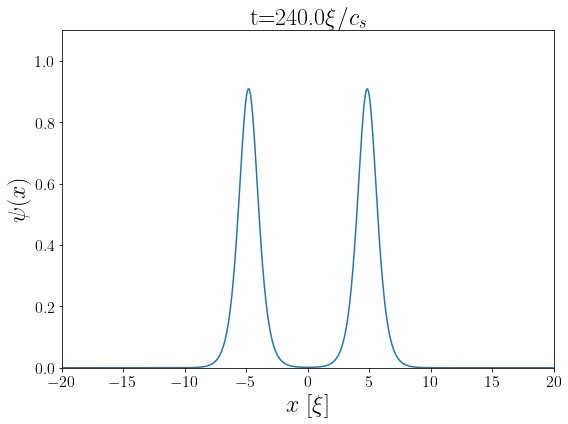

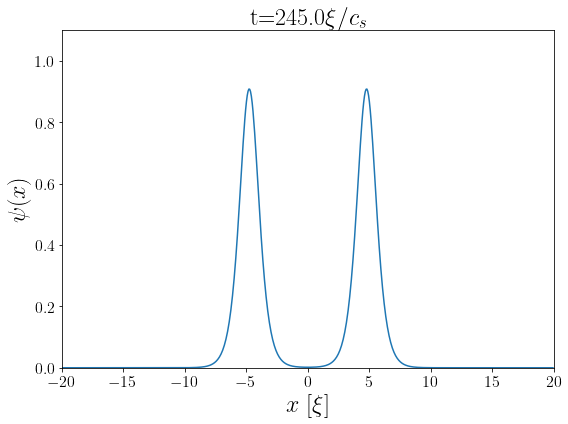

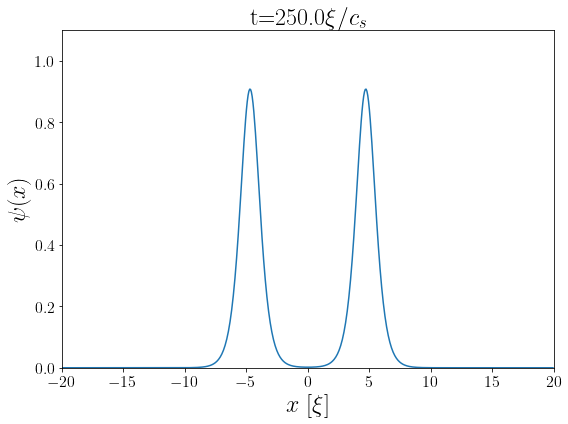

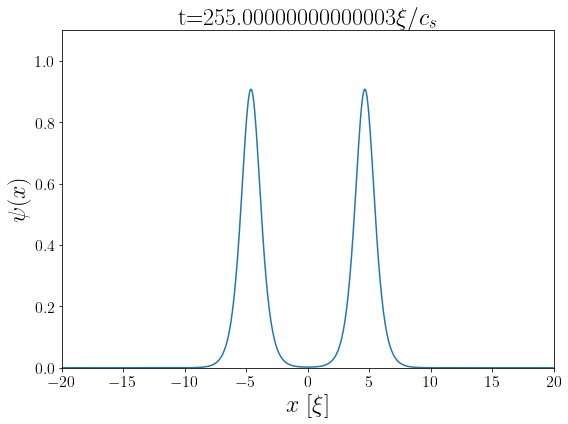

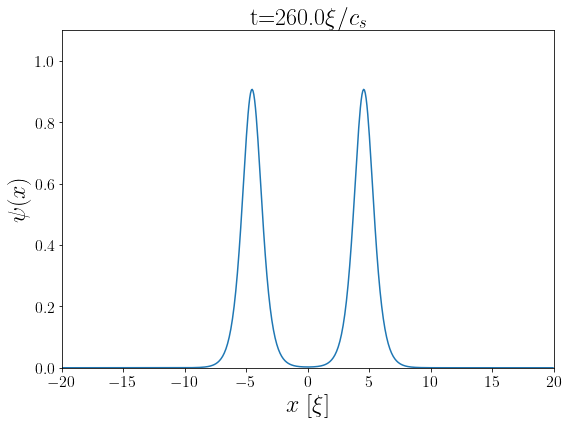

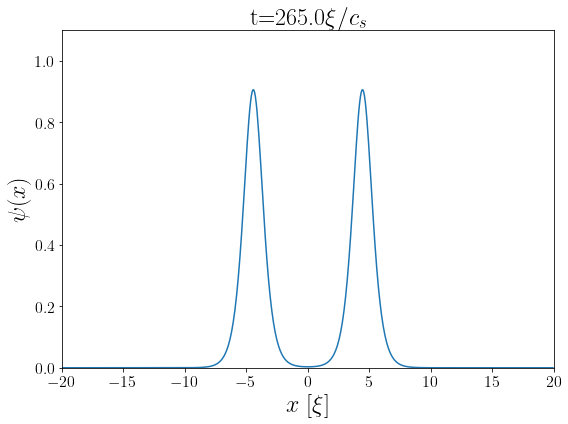

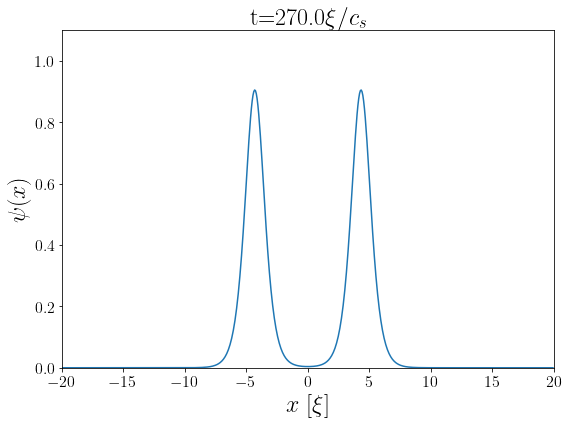

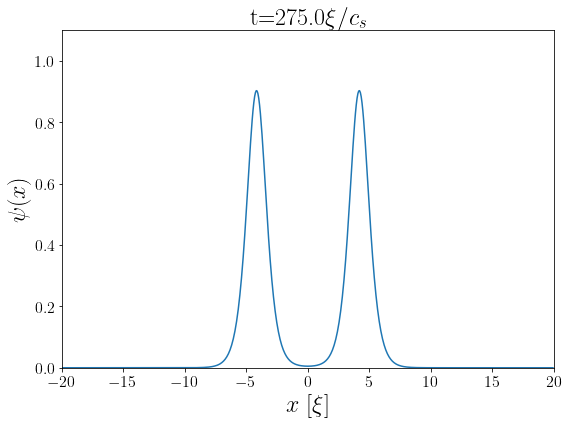

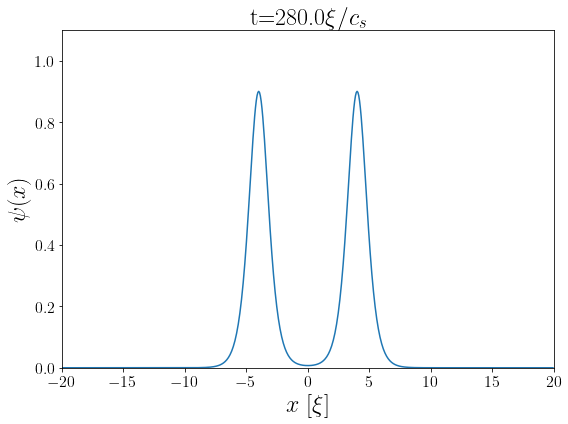

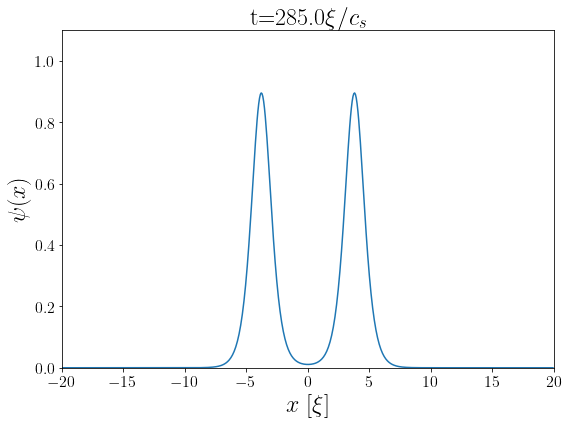

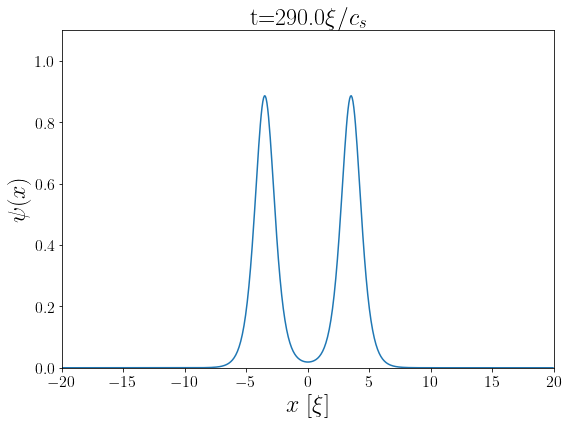

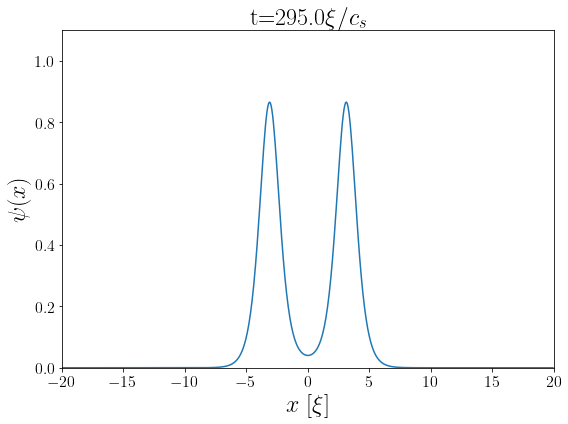

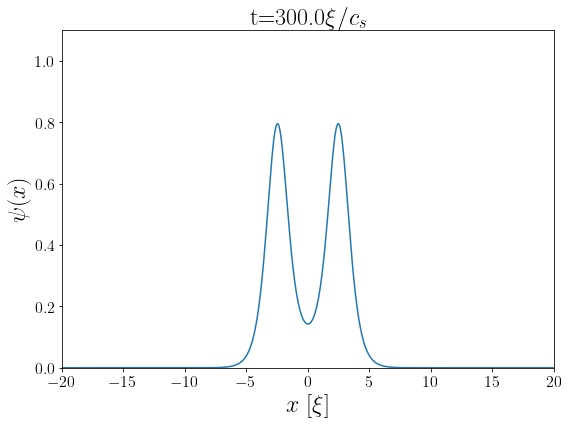

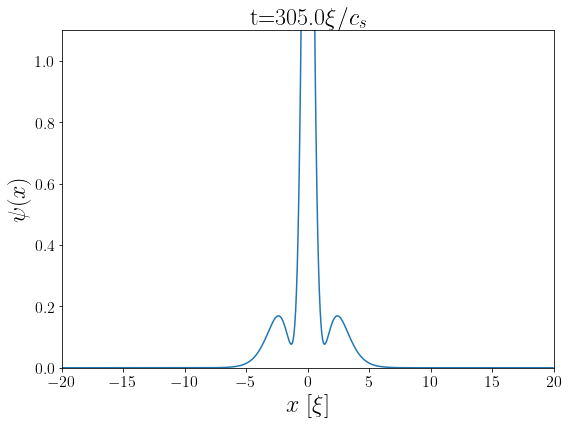

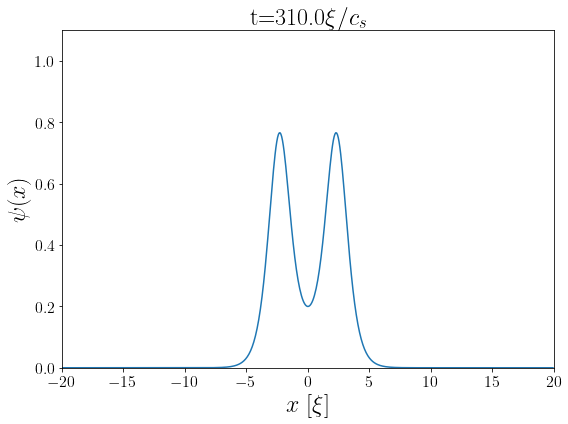

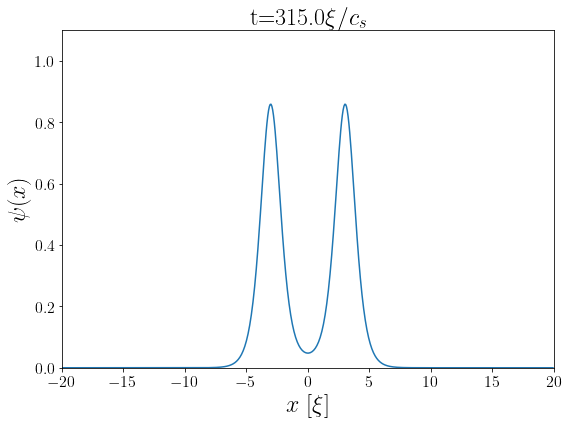

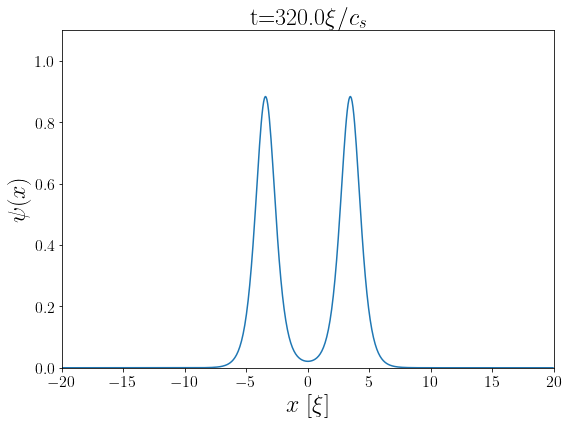

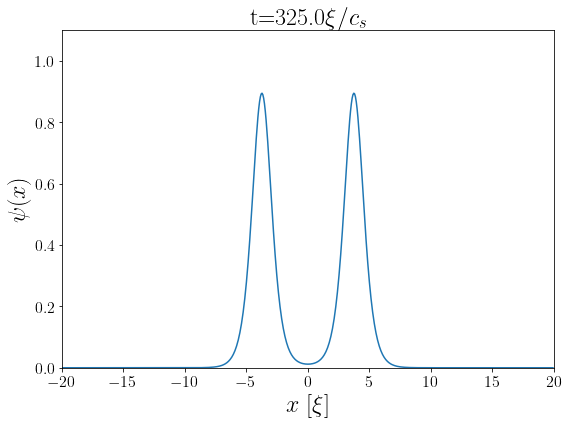

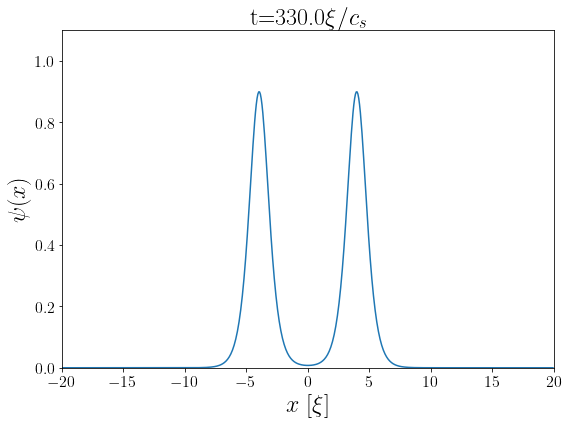

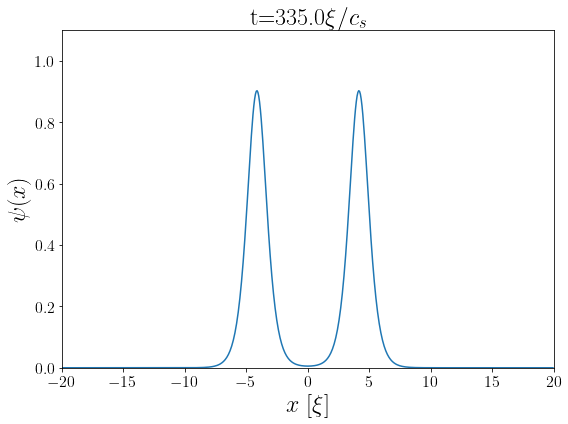

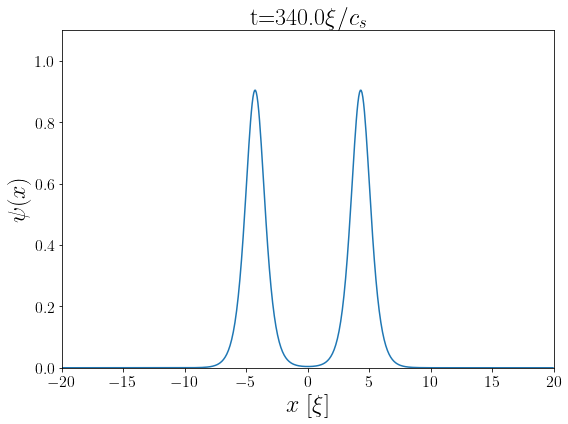

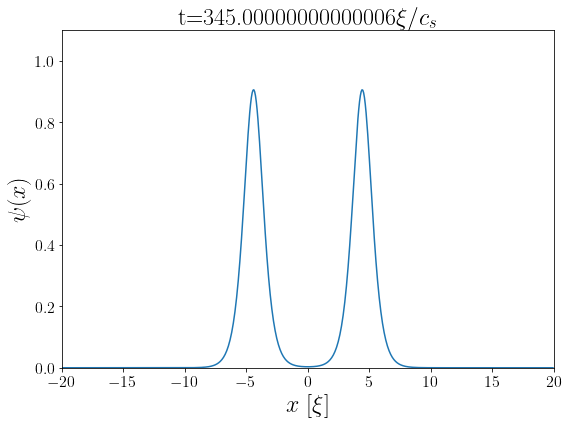

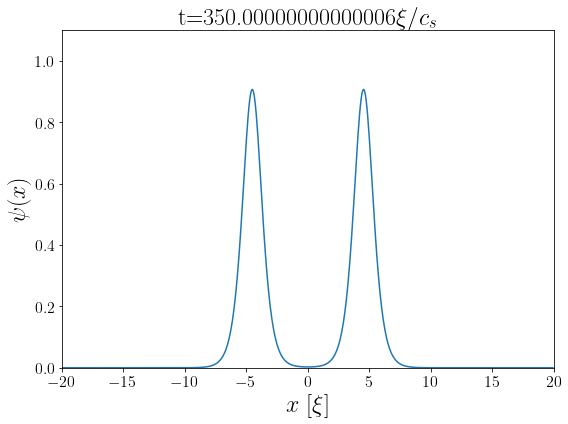

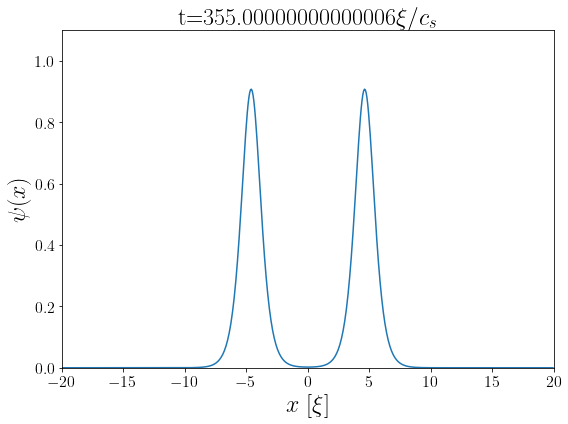

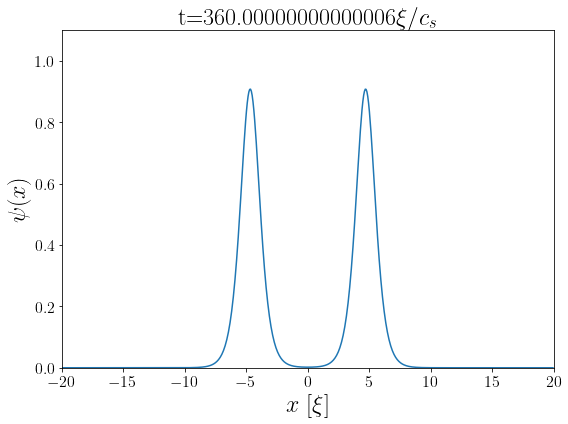

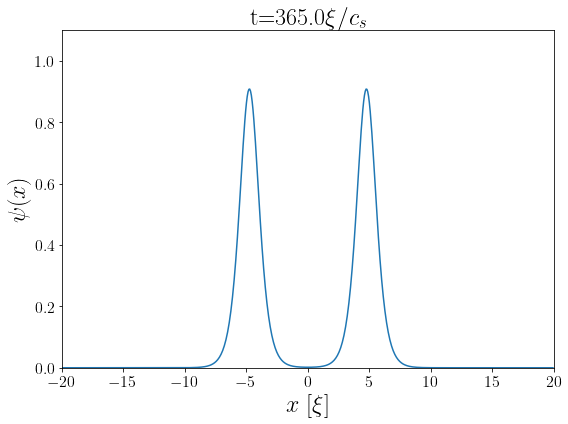

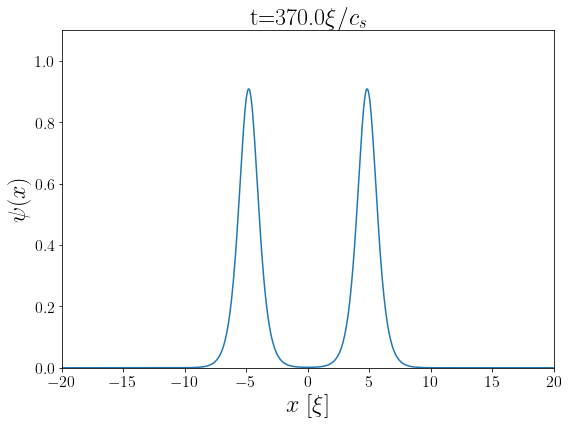

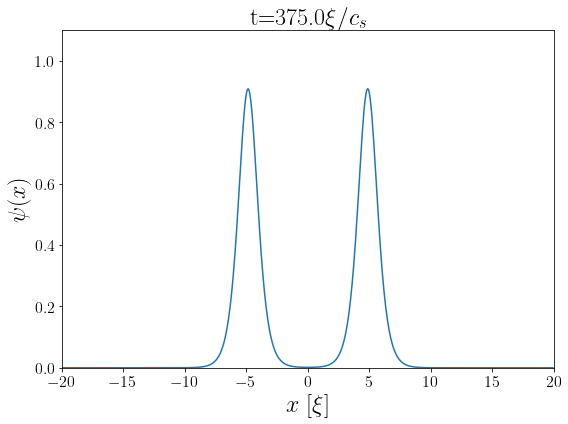

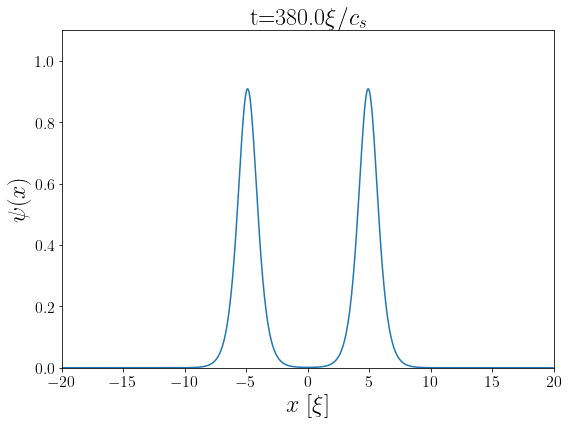

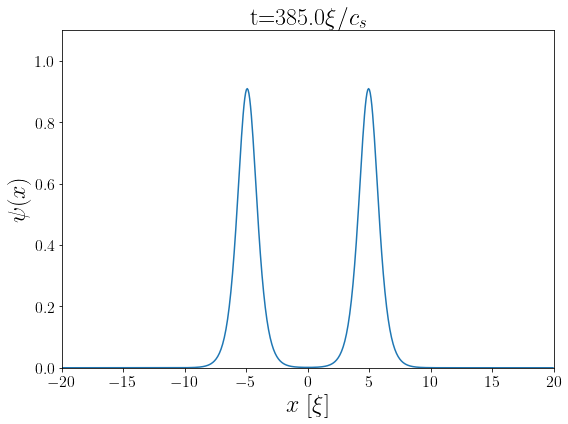

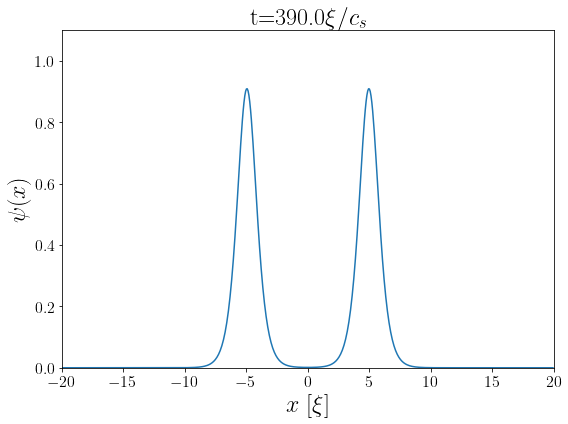

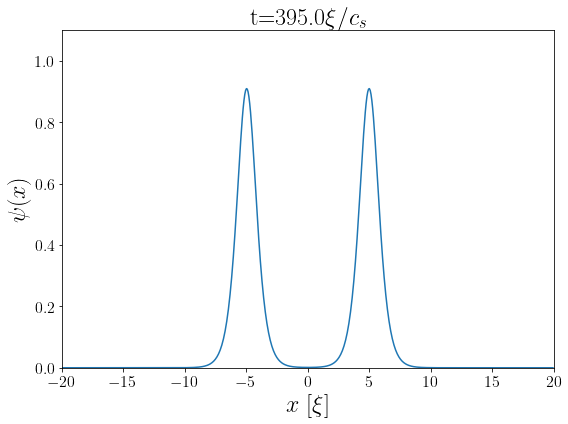

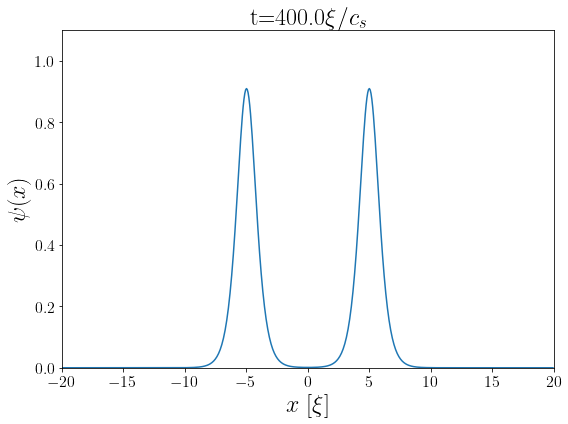

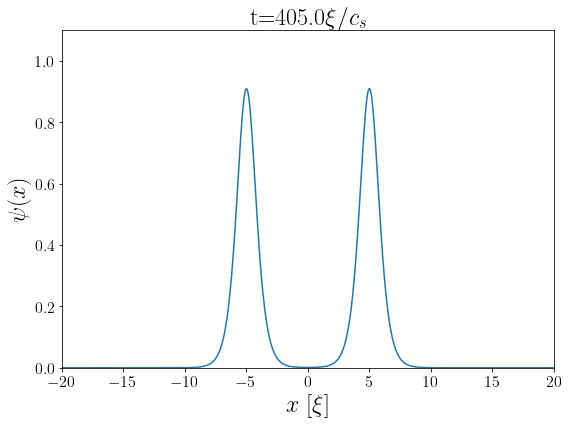

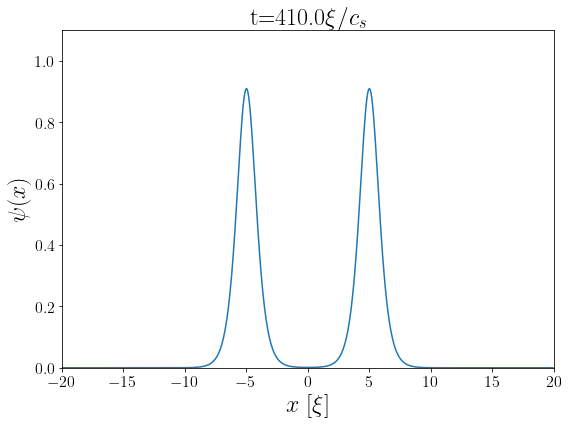

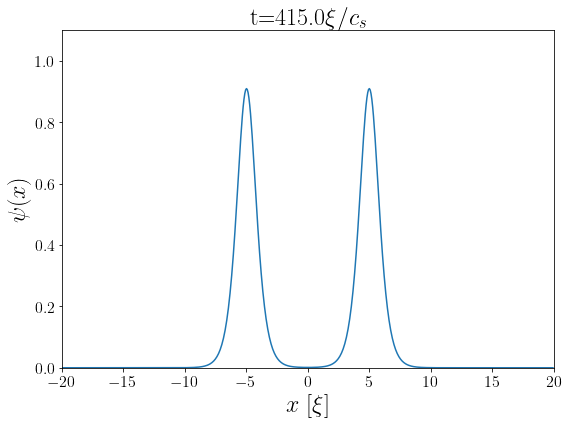

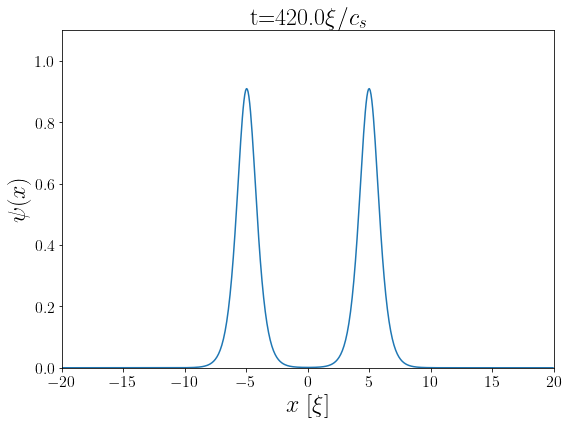

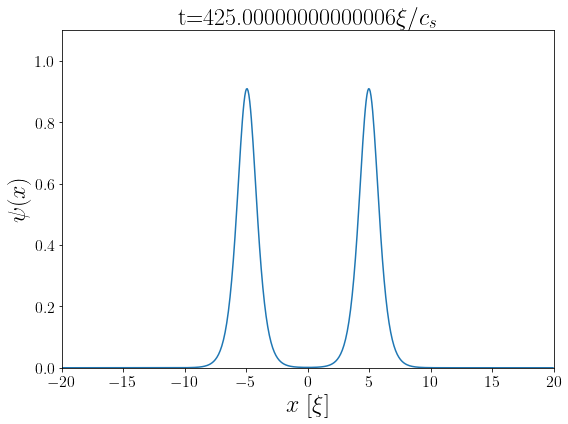

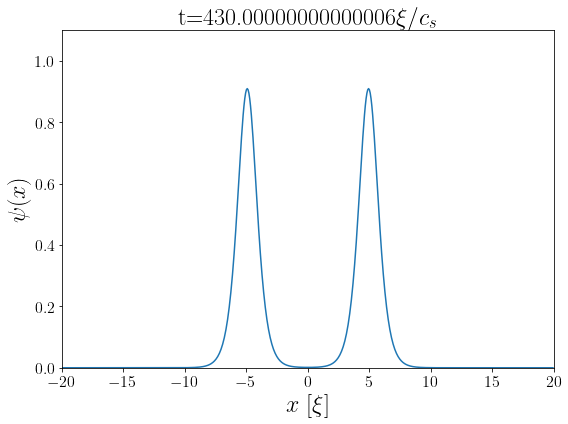

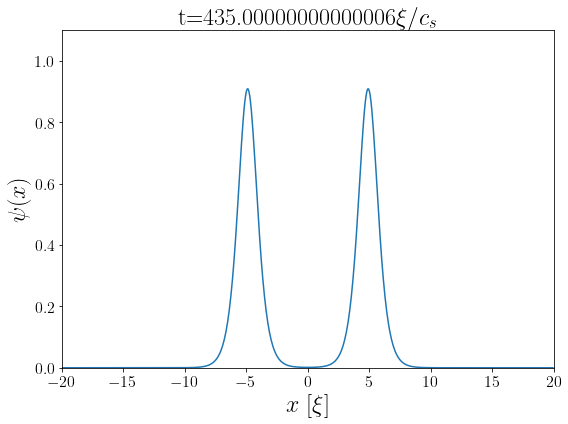

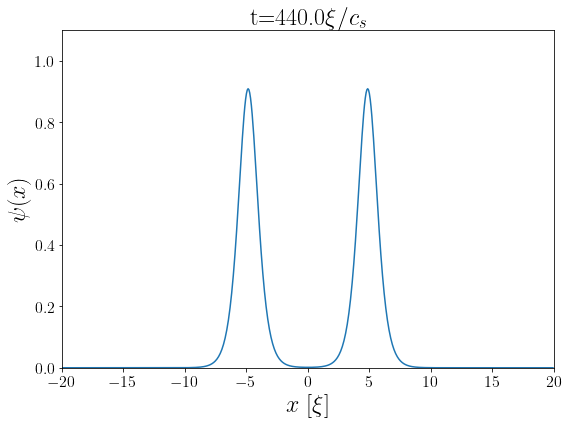

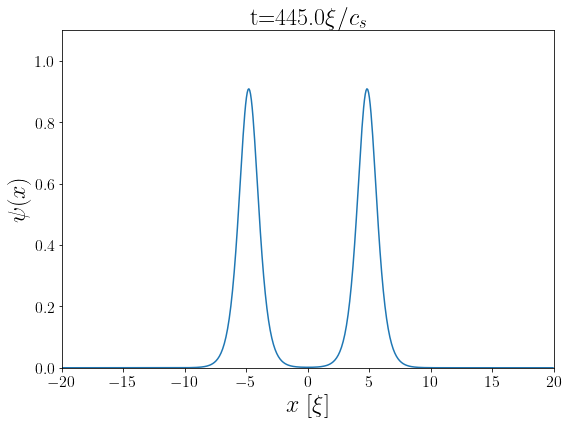

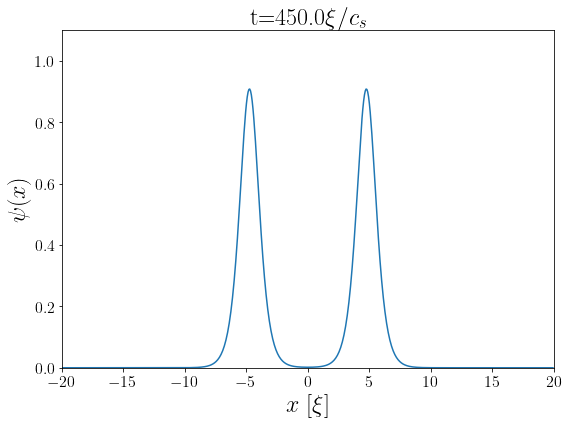

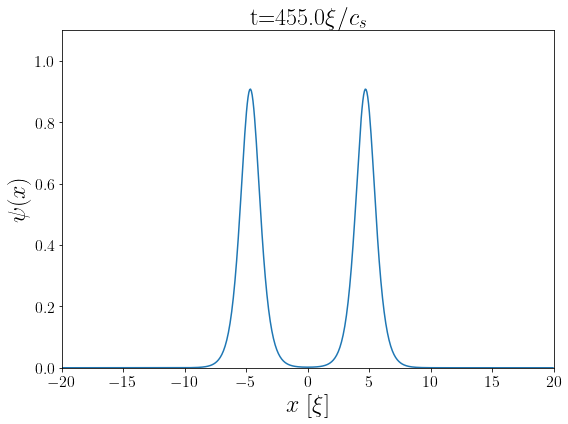

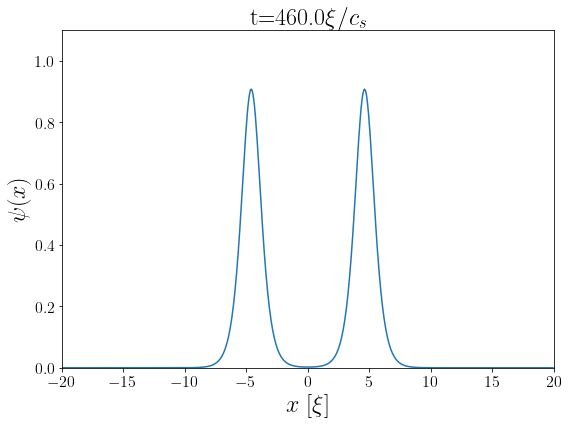

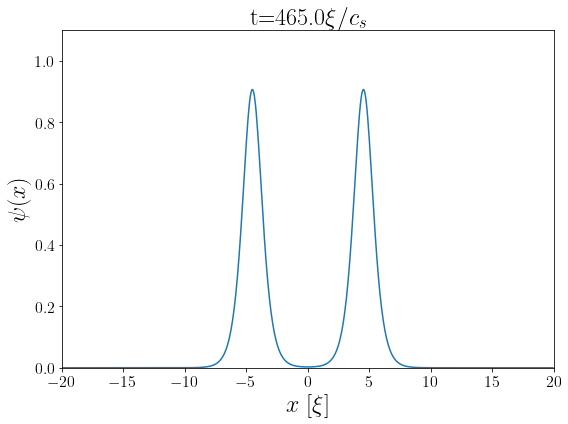

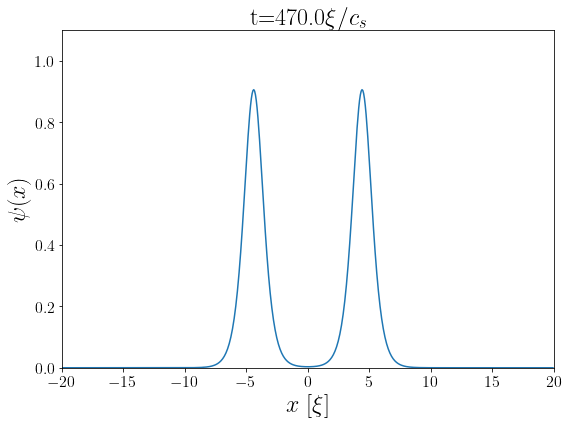

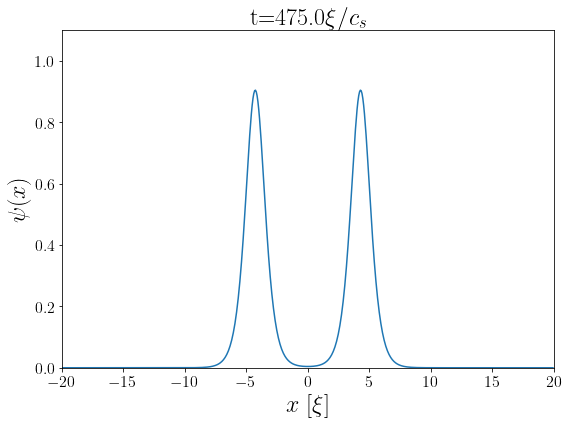

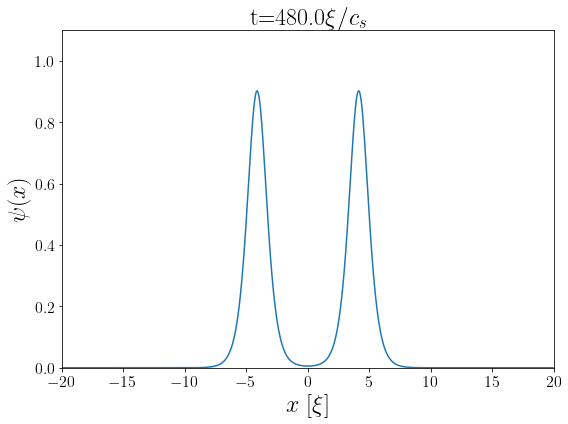

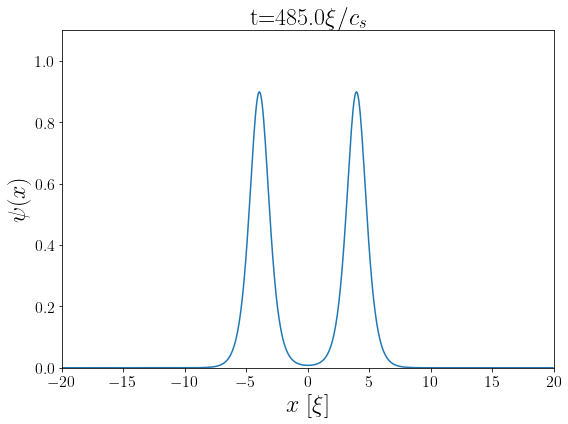

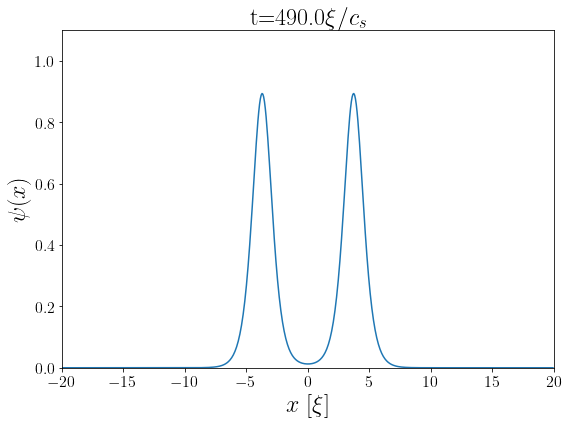

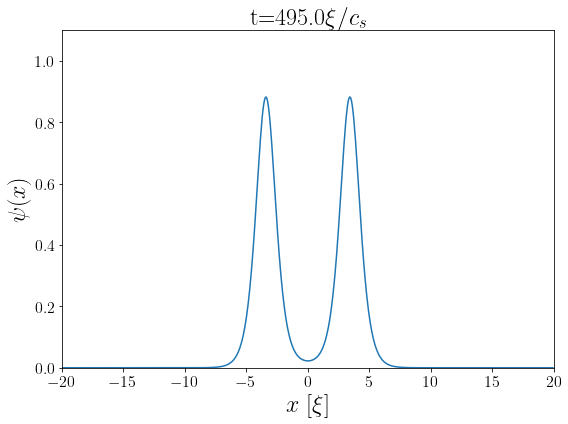

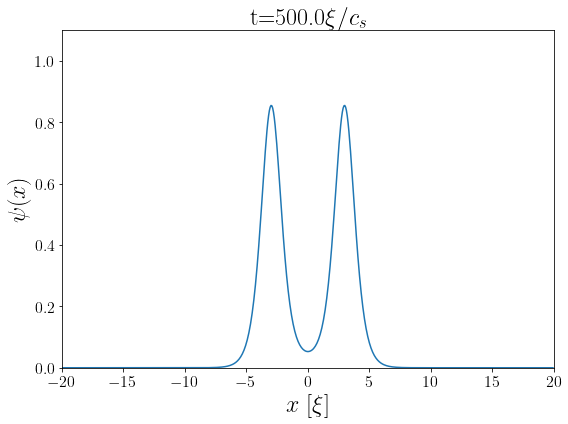

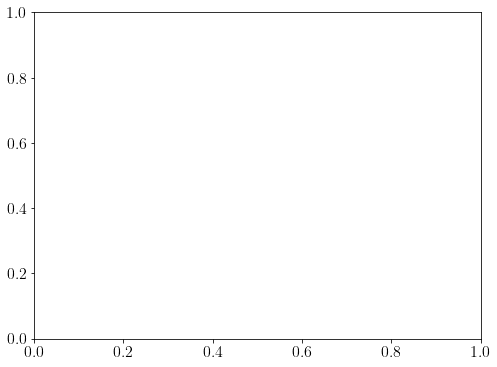

In [348]:
for i in range(len(GPE.prob_densities)):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, GPE.prob_densities[i*5000])
    ax.set_xlim(-20, 20)
    ax.set_ylim(0, 1.1)
    ax.set_title(f't={i*dT*5000}'+r'$\xi/c_s$')
    ax.set_xlabel('$x$ $[\\xi]$')
    ax.set_ylabel('$\psi(x)$')
    fig.tight_layout()
    plt.savefig(figure_path+f'/Soliton1D/GPE_Soliton1D_{i}Bright.png', dpi=100, bbox_inches='tight')

In [349]:
from PIL import Image
imgs = [Image.open(figure_path+f'/Soliton1D/GPE_Soliton1D_{i}Bright.png') for i in range(100)]
imgs[0].save(figure_path+"/Soliton1D/GPE_Soliton1DBright.gif", save_all=True, append_images=imgs[1:], duration=80, loop=0)